In [1]:
from easydict import EasyDict as edict

import numpy as np



In [2]:
acc = edict()
acc.trainL2 = []
acc.testL2 = []
acc.trainLinf = []
acc.testLinf = []

In [3]:
import os
import glob
files = [f for f in glob.glob("*.npz")]
print(os.getcwd())

files = sorted(files)
files


/Users/yifanc/Research/python_code/GP-PDEs-time-stepping/HighDimeqn/DGX-logs/logs/NonVarLinElliptic/dim2-10_kernelinv_quadratics


['s0.25_Nd1000_Nb200_Nt1000_n1e-10_fa1.0_fu4.0_cos_nexp10_0202_222330.log.npz',
 's0.25_Nd2000_Nb400_Nt2000_n1e-10_fa1.0_fu4.0_cos_nexp10_0202_222330.log.npz',
 's0.25_Nd4000_Nb800_Nt4000_n1e-10_fa1.0_fu4.0_cos_nexp10_0202_222330.log.npz',
 's0.25_Nd8000_Nb1600_Nt8000_n1e-10_fa1.0_fu4.0_cos_nexp10_0202_222330.log.npz']

In [4]:
for i in range(4):
    data = np.load(files[i])
    acc.trainL2.append(np.sum(data["trainL2"],axis = 1))
    acc.testL2.append(np.sum(data["testL2"],axis=1))
    acc.trainLinf.append(np.sum(data["trainLinf"],axis=1))
    acc.testLinf.append(np.sum(data["testLinf"],axis=1))


In [5]:
acc.trainL2 = np.array(acc.trainL2)
acc.testL2 = np.array(acc.testL2)
acc.trainLinf = np.array(acc.trainLinf)
acc.testLinf = np.array(acc.testLinf)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# plot parameters
def set_plot():
    fsize = 15
    tsize = 15
    tdir = 'in'
    major = 5.0
    minor = 3.0
    lwidth = 0.8
    lhandle = 2.0
    plt.style.use('default')
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.size'] = fsize
    plt.rcParams['legend.fontsize'] = tsize
    plt.rcParams['xtick.direction'] = tdir
    plt.rcParams['ytick.direction'] = tdir
    plt.rcParams['xtick.major.size'] = major
    plt.rcParams['xtick.minor.size'] = minor
    plt.rcParams['ytick.major.size'] = 5.0
    plt.rcParams['ytick.minor.size'] = 3.0
    plt.rcParams['axes.linewidth'] = lwidth
    plt.rcParams['legend.handlelength'] = lhandle
    
    fmt = ticker.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))
    return fmt

fmt = set_plot()

In [7]:
from scipy.stats import linregress


Text(0, 0.5, 'slope')

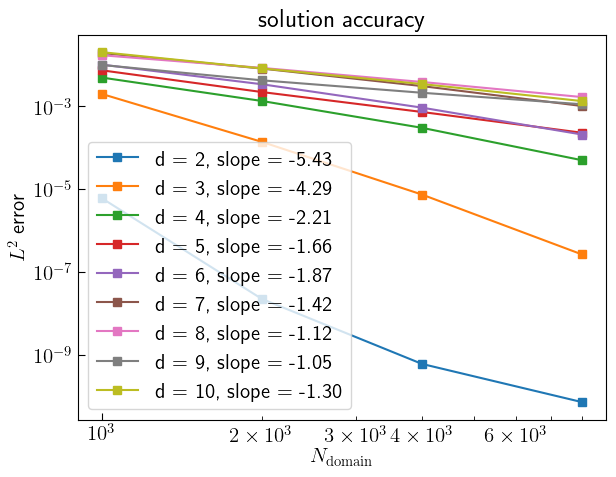

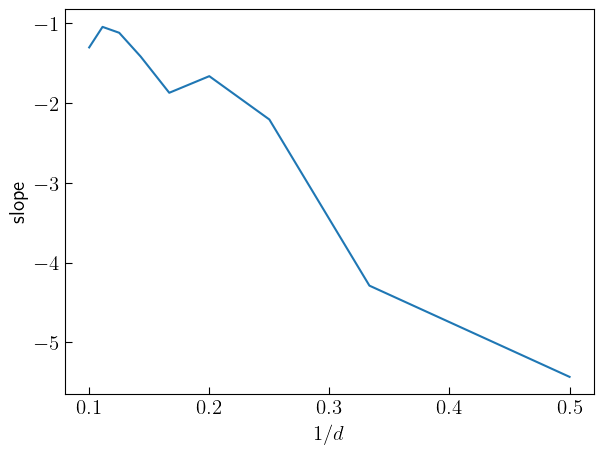

In [27]:

dim = np.arange(2,11)
# dim_idx = [1,3,5,7]
dim_idx = np.arange(0,9)
plot_dim = dim[dim_idx]

N_domain = [1000,2000,4000,8000]
arr_slope = []
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
for i in range(len(dim_idx)):
    X = N_domain
    Y = acc.testL2[:,dim_idx[i]]
    logX = np.log(N_domain)
    logY = np.log(Y)
    
    result = linregress(logX, logY)
    arr_slope.append(result.slope)
    ax.plot(X,Y, '-s', label = f"d = {plot_dim[i]}, slope = {result.slope:.2f}")

plt.xscale("log")
plt.yscale("log")
plt.xlabel('$N_{\mathrm{domain}}$')
plt.ylabel('$L^2$ error')
plt.title('solution accuracy')
plt.legend()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.plot(1./plot_dim, arr_slope)
plt.xlabel('$1/d$')
plt.ylabel('slope')

Text(0, 0.5, 'slope')

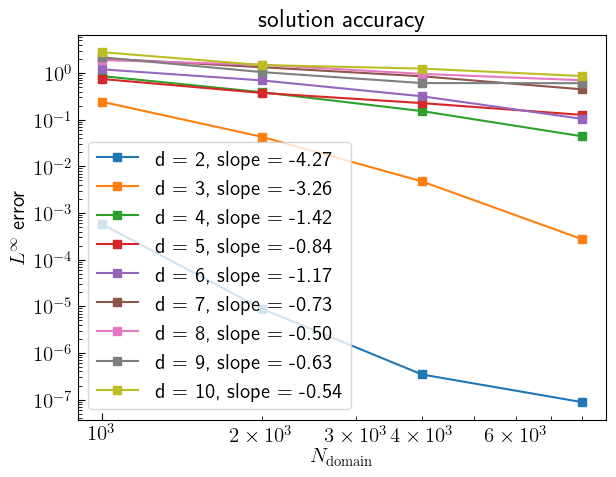

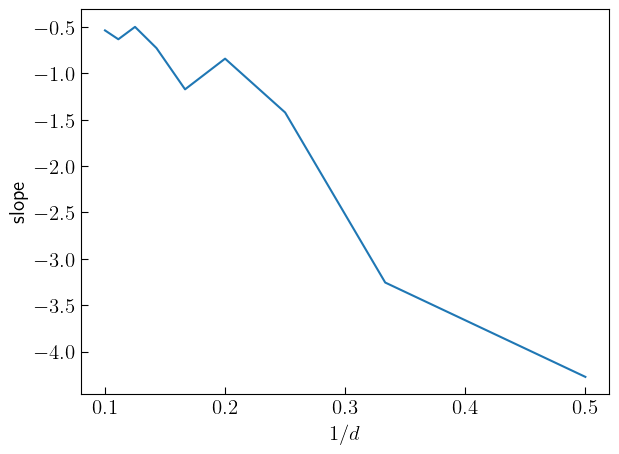

In [25]:

dim = np.arange(2,11)
# dim_idx = [1,3,5,7]
dim_idx = np.arange(0,9)
plot_dim = dim[dim_idx]

N_domain = [1000,2000,4000,8000]
arr_slope = []
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
for i in range(len(dim_idx)):
    X = N_domain
    Y = acc.testLinf[:,dim_idx[i]]
    logX = np.log(N_domain)
    logY = np.log(Y)
    
    result = linregress(logX, logY)
    arr_slope.append(result.slope)
    ax.plot(X,Y, '-s', label = f"d = {plot_dim[i]}, slope = {result.slope:.2f}")

plt.xscale("log")
plt.yscale("log")
plt.xlabel('$N_{\mathrm{domain}}$')
plt.ylabel('$L^{\infty}$ error')
plt.title('solution accuracy')
plt.legend()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.plot(1./plot_dim, arr_slope)
plt.xlabel('$1/d$')
plt.ylabel('slope')
